# Derived-term Automata for Extended Weighted Rational Expressions
This page is a complement to [Derived-term Automata for Extended Weighted Rational Expressions](https://www.lrde.epita.fr/wiki/Publications/demaille.16.ictac) presented at ICTAC 2016.  This page exists in several forms:
- [A Dynamic Notebook](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/ICTAC-2016.ipynb), which can be edited, played with
- [A static HTML page](http://www.lrde.epita.fr/dload/vcsn/latest/notebooks/ICTAC-2016.html), whose graphical rendering is always correct.

More information is available here:
- [Documentation for _expression_.derivation](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.derivation.ipynb)
- [Documentation for _expression_.expansion](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.expansion.ipynb)
- [Documentation for _expression_.derived_term](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.derived_term.ipynb)
- [Documentation of Vcsn](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/!Read-me-first.ipynb)
- [Vcsn's web page](http://vcsn.lrde.epita.fr)

You may change the cells, and run then.  To run a cell in a notebook, hit "Control-Enter" (in which case the focus stays on the same cell) or "Shift-Enter" (focus goes to the next cell).  Beware that depending on the requested operations, Vcsn may generate and compile code, which may be a really slow process on small machines (about a minute): be patient!  However, the code is compiled only once: successive uses will be way faster.

To run all the cells anew, select "Restart & Run All" in the "Kernel" menu above.

In [1]:
import vcsn

## Valid Expressions
Beware that the so-called ''context'' (which, in Vcsn parlance denotes the type of labels (letters or words, etc.) and the semiring of weights) has an extreme importance.  In particular, an expression might be valid in a given context, and invalid in another.

As an example, ${a^*}^*$ is valid in $\mathbb{B}$, so we can build its derived-term automaton.

In [2]:
e = vcsn.B.expression('a**'); e.is_valid()

True

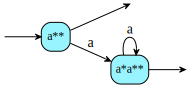

In [3]:
e.derived_term()

However, the construction will fail in $\mathbb{Q}$, since the constant term for $a^*$ is 1, which is not starrable in $\mathbb{Q}$ (indeed, $1^* = \sum_{k \in \mathbb{N}} 1^k$ is not a value in $\mathbb{Q}$).

In [4]:
e = vcsn.Q.expression('a**'); e.is_valid()

False

In [5]:
try:
    e.derived_term()
except RuntimeError as err:
    print("error:", err)

error: ℚ: value is not starrable: 1
  while computing expansion of: a**
  while computing derived-term of: a**


## Example $\mathsf{E}_3$: A Lex-like Scanner
### Desugaring

We introduce the "context" (i.e., the automaton type) that corresponds to labels that are `a` or `b` (`[ab]`) and weights that are rational numbers (`Q`).

In [6]:
Q = vcsn.context('[ab] -> Q')
Q

[ab]? → ℚ

Vcsn supports the `<+` operator.  It is desugared in a combination of conjuction and complement.

In [7]:
e3 = Q.expression('<2>(ab) <+ <3>[ab]{+}')
e3

⟨2⟩(ab)+(ab)ᶜ&⟨3⟩((a+b)(a+b)*)

### The Derived-Term Automaton
The expansion and the derived-term automaton of $\mathsf{E}_3$ follow.

In [8]:
e3.expansion()

a⊙[⟨2⟩b ⊕ ⟨3⟩bᶜ&(a+b)*] ⊕ b⊙[⟨3⟩(a+b)*]

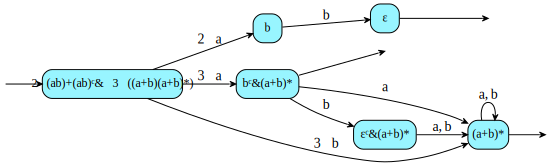

In [9]:
e3.derived_term()

## Example $\mathsf{E}_1$: A Simple Expression
### Polynomials and Derivatives

In [10]:
Z = vcsn.context('[...] -> Z')
e1 = Z.expression('<5>\e + <2>ace + <6>bce + <4>ade + <3>bde')
e1

⟨5⟩ε+⟨2⟩(ace)+⟨4⟩(ade)+⟨6⟩(bce)+⟨3⟩(bde)

The derivatives of $\mathsf{E}_1$ with respect to $a$ and $b$ are the following polynomials.

In [11]:
e1.derivation('a')

⟨2⟩ce ⊕ ⟨4⟩de

In [12]:
e1.derivation('b')

⟨6⟩ce ⊕ ⟨3⟩de

The expansion of $\mathsf{E}_1$ is as follows.  The notation is slightly different from the paper, where for higher clarity the weights in the polynomials are separated from the expressions by a $\otimes$.  In the implementation, since the weight is always displayed, this separation is useless, and not put, for conciseness.

In [13]:
e1.expansion()

⟨5⟩ ⊕ a⊙[⟨2⟩ce ⊕ ⟨4⟩de] ⊕ b⊙[⟨6⟩ce ⊕ ⟨3⟩de]

### The Derived-Term Automaton
The derived-term automaton can be computed using derivations or expansions.

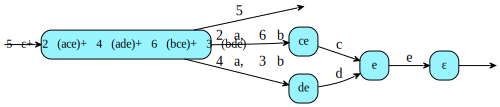

In [14]:
e1.derived_term('expansion')

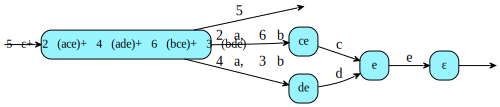

In [15]:
e1.derived_term('derivation')

### The Deterministic Derived-Term Automaton

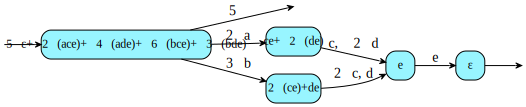

In [16]:
e1.derived_term(deterministic=True)

## Section 4.2: An Infinite Automaton
There exists no finite weighted _deterministic_ automaton for the following expression.

In [17]:
e = Q.expression('a* + (<2>a)*')
e

a*+(⟨2⟩a)*

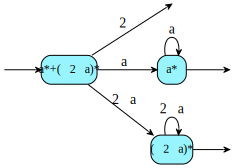

In [18]:
e.derived_term()

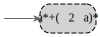

In [19]:
a = e.derived_term(deterministic=True, lazy=True)
a

Repeated evaluations uncover parts of this automaton.

2


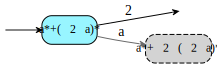

In [20]:
print(a('')); a

5


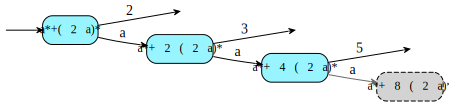

In [21]:
print(a('aa')); a

17


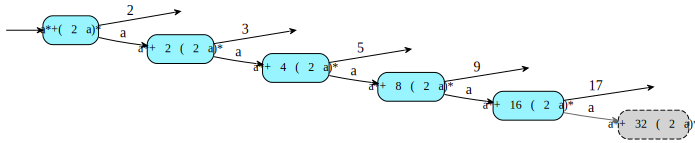

In [22]:
print(a('aaaa')); a

## Section 5: Related Work
### Additional Operators
The following automata demonstrate the support of the shuffle operator (denoted '`:`' in ASCII, and '$\between$' in $\LaTeX$), and the infiltrate operator ('`&:`' and '$\uparrow$').  See also the documentation of the corresponding operations on automata: [automaton.shuffle](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/automaton.shuffle.ipynb) and [automaton.infiltrate](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/automaton.infiltrate.ipynb).

In [23]:
exp = vcsn.context('[...] -> q').expression
e1 = exp('<2>a<3>a : <5>a<6>a', 'trivial')
e1

⟨2⟩a⟨3⟩a:⟨5⟩a⟨6⟩a

The `'trivial'` argument above restricts the identities to the trivial ones, otherwise additional identities would defeat our attempt to "taint" the `a`s below:

In [24]:
exp('<2>a<3>a : <5>a<6>a')

⟨6⟩(aa):⟨30⟩(aa)

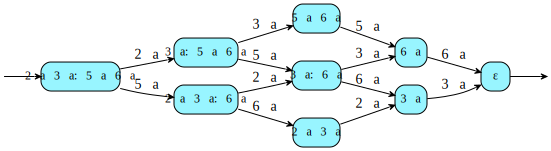

In [25]:
e1.derived_term()

In [26]:
e2 = exp('<2>a<3>a &: <5>a<6>a', 'trivial')
e2

⟨2⟩a⟨3⟩a&:⟨5⟩a⟨6⟩a

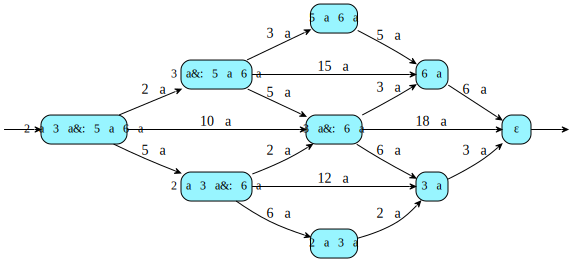

In [27]:
e2.derived_term()

### Broken Derived Terms
"Breaking" variants "split" the polynomials at each step. In short, it means that no state will be labeled by an addition: rather the addition is split into several states. As a consequence, the automaton might have several initial states.

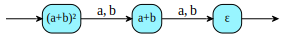

In [28]:
e3 = exp('[ab]{2}')
e3.derived_term()

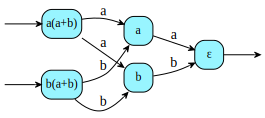

In [29]:
e3.derived_term(breaking=True)